# Importing Packages

In [2]:
import pandas as pd
import numpy as np
import scipy as scipy
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('hotel_bookings.csv')
df.shape

(119390, 32)

# Creating Numpy arrays of numerical variables 

In [3]:
#create numpy arrays of numerical columns 
lead_time = np.array(df['lead_time'])
is_canceled = np.array(df['is_canceled'])
stays_in_weekend_nights = np.array(df['stays_in_weekend_nights'])
stays_in_week_nights = np.array(df['stays_in_week_nights'])
adults = np.array(df['adults'])
children = np.array(df['children'])
adults = np.array(df['adults'])
babies = np.array(df['babies'])
is_repeated_guest = np.array(df['is_repeated_guest'])
previous_cancellations = np.array(df['previous_cancellations'])
previous_bookings_not_canceled =np.array(df['previous_bookings_not_canceled'])
booking_changes = np.array(df['booking_changes'])
days_in_waiting_list = np.array(df['days_in_waiting_list'])
adr = np.array(df['adr'])
required_car_parking_spaces = np.array(df['required_car_parking_spaces'])
total_of_special_requests  = np.array(df['total_of_special_requests'])

# Removing missing values

In [4]:
# Missing values

df.isnull().sum() #checking to see which variables having missing and sum (children(4), country (488), agent(16340) and company(112593) having missing)
df['children']=df.children.fillna(0) #fill missing rows for children with 0 
df = df.drop(['agent','company'], axis=1) #drop agent(ID column) and company column as it contains too many missing values
df = df.dropna(axis=0, subset=['country']) #since country only has 488/119390 missing values we are dropping rows with missing values
df.isnull().sum() #dataset now contains no missing values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Creating a pandas datetime column

In [5]:
#combining date columns into a single pandas date time format 
df['date'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format='%Y%B%d')
df['date'].dtype
df #data frame now contains a pandas date time format date column



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/15,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/15,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/15,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/15,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/15,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/17,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/17,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/17,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/17,2017-08-31


# Descriptive Statistics

In [6]:
#excluding objects quickly describe the dataset 
df.describe(include='all', datetime_is_numeric=True)

#Descriptive Statistics
#On average, consumers booked in advance 104 days ahead of their booking (where 1 Standard deviation ~ 107 days)
    #Half of the consumers in our dataset booked 69 days in advance and a quarter of the consumers had a lead time greater than 161 days

#On average the average daily rate for a booking was $102 (where S.D.= $50.5)
    #Half of the bookings had a average daily rate of $95 and 25% had a avg daily rate of $126

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
count,118902,118902.000000,118902.000000,118902.000000,118902,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,...,118902.000000,118902,118902.000000,118902,118902.000000,118902.000000,118902.000000,118902,118902,118902
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,4,NaN,NaN,NaN,3,926,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/15,NaN
freq,79306,NaN,NaN,NaN,13856,NaN,NaN,NaN,NaN,NaN,...,NaN,104167,NaN,89174,NaN,NaN,NaN,74745,1461,NaN
mean,NaN,0.371373,104.308027,2016.157617,NaN,27.166726,15.800567,0.928891,2.502136,1.858404,...,0.221174,NaN,2.330676,NaN,102.000808,0.061883,0.571706,NaN,NaN,2016-08-29 02:21:14.905386240
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,2015-07-01 00:00:00
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN,2016-03-14 00:00:00
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN,2016-09-07 00:00:00
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,2017-03-19 00:00:00
max,NaN,1.000000,737.000000,2017.000000,NaN,53.000000,31.000000,16.000000,41.000000,55.000000,...,21.000000,NaN,391.000000,NaN,5400.000000,8.000000,5.000000,NaN,NaN,2017-08-31 00:00:00


# Percent of bookings canceled vs. not canceled

In [7]:
df.is_canceled.value_counts(normalize=True)
#62.86% of the bookings were not canceled
#37.13% of the bookings were canceled 

#37.13% of the bookings were canceled in this dataset. This is a large number of canacellations. Let's further explore below


0    0.628627
1    0.371373
Name: is_canceled, dtype: float64

# Correlation Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'is_canceled'),
  Text(1.5, 0, 'lead_time'),
  Text(2.5, 0, 'arrival_date_year'),
  Text(3.5, 0, 'arrival_date_week_number'),
  Text(4.5, 0, 'arrival_date_day_of_month'),
  Text(5.5, 0, 'stays_in_weekend_nights'),
  Text(6.5, 0, 'stays_in_week_nights'),
  Text(7.5, 0, 'adults'),
  Text(8.5, 0, 'children'),
  Text(9.5, 0, 'babies'),
  Text(10.5, 0, 'is_repeated_guest'),
  Text(11.5, 0, 'previous_cancellations'),
  Text(12.5, 0, 'previous_bookings_not_canceled'),
  Text(13.5, 0, 'booking_changes'),
  Text(14.5, 0, 'days_in_waiting_list'),
  Text(15.5, 0, 'adr'),
  Text(16.5, 0, 'required_car_parking_spaces'),
  Text(17.5, 0, 'total_of_special_requests')])

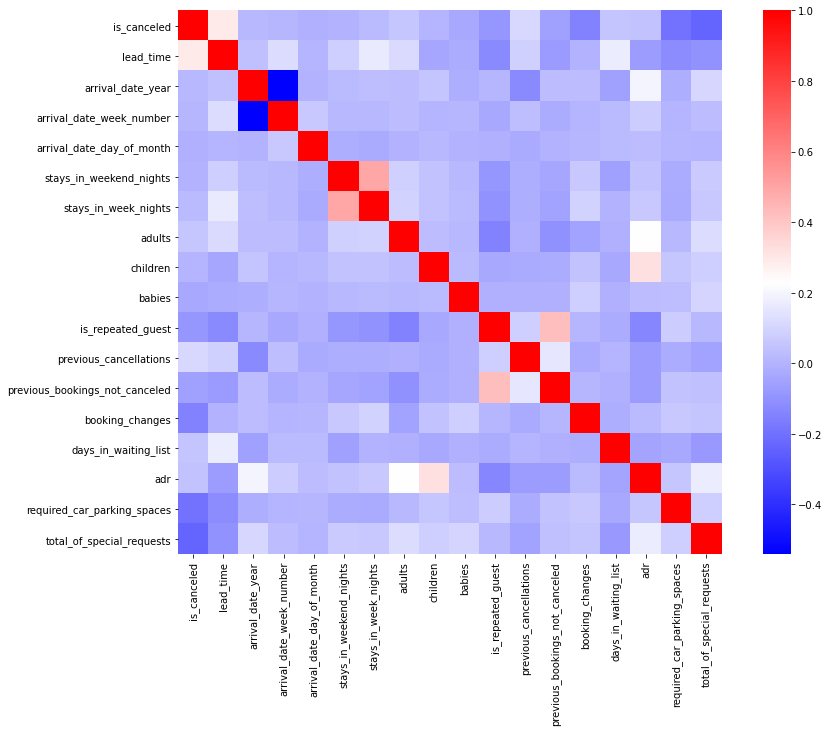

In [8]:
#Now let's look at a heatmap matrix for correlations amongst variables
plt.figure(figsize=(15, 10))
correlations = df.corr()
sns.heatmap(data = correlations, square = True, cmap="bwr")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#The heatmap below shows that there are no highly correlated variables both in positive and negative terms 

# Correlation Matrix

In [9]:
#To confirm our conviction of low correlations amongst variables let's take one more look at a correlation matrix in a table format
correlations = df.corr()
correlations

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291940,0.016339,0.007481,-0.006173,-0.002639,0.024103,0.058408,0.004740,-0.032523,-0.085185,0.109914,-0.055495,-0.144669,0.054008,0.046133,-0.194801,-0.235595
lead_time,0.291940,1.000000,0.039974,0.126724,0.002354,0.083988,0.164783,0.116773,-0.038326,-0.021146,-0.125084,0.085962,-0.071124,0.000014,0.170008,-0.066332,-0.115551,-0.096560
arrival_date_year,0.016339,0.039974,1.000000,-0.540488,-0.000531,0.021678,0.031759,0.029107,0.054504,-0.013178,0.010137,-0.119911,0.029804,0.031141,-0.056813,0.197919,-0.012646,0.108873
arrival_date_week_number,0.007481,0.126724,-0.540488,1.000000,0.066824,0.017640,0.015006,0.025402,0.005490,0.010038,-0.030414,0.035366,-0.020769,0.005183,0.022992,0.075256,0.001714,0.025788
arrival_date_day_of_month,-0.006173,0.002354,-0.000531,0.066824,1.000000,-0.015903,-0.027589,-0.001864,0.014571,-0.000536,-0.006334,-0.027009,0.000121,0.010779,0.022741,0.029980,0.008271,0.003050
stays_in_weekend_nights,-0.002639,0.083988,0.021678,0.017640,-0.015903,1.000000,0.494890,0.090392,0.045431,0.018397,-0.087833,-0.013007,-0.040596,0.062402,-0.054566,0.047319,-0.018145,0.071654
stays_in_week_nights,0.024103,0.164783,0.031759,0.015006,-0.027589,0.494890,1.000000,0.091991,0.044260,0.020157,-0.097992,-0.014273,-0.047366,0.095664,-0.002160,0.063647,-0.024376,0.066778
adults,0.058408,0.116773,0.029107,0.025402,-0.001864,0.090392,0.091991,1.000000,0.029584,0.017884,-0.147496,-0.006976,-0.105028,-0.052427,-0.008768,0.227431,0.016364,0.121844
children,0.004740,-0.038326,0.054504,0.005490,0.014571,0.045431,0.044260,0.029584,1.000000,0.024131,-0.032988,-0.024751,-0.020364,0.048663,-0.033395,0.325033,0.057063,0.081777
babies,-0.032523,-0.021146,-0.013178,0.010038,-0.000536,0.018397,0.020157,0.017884,0.024131,1.000000,-0.008954,-0.007489,-0.006305,0.083221,-0.010648,0.028594,0.036971,0.097597


In [10]:
#Since our focus is on cancellations, let's explore correlations using a Point Biserial to compare a continous variable to a binary variable
#Below we see that there is no correlation that exists in these continous variables 
#Low correlation found between lead time,is_repeated_guest, previous_cancellations and if it was canceled or not 

a = scipy.stats.pointbiserialr(lead_time, is_canceled)
b = scipy.stats.pointbiserialr(is_repeated_guest, is_canceled)
c = scipy.stats.pointbiserialr(previous_cancellations, is_canceled)
d = scipy.stats.pointbiserialr(adr, is_canceled)
#e = scipy.stats.pointbiserialr(children, is_canceled)

print('lead_time:',a)
print('is_repeated_guest:',b)
print('previous_cancellations:',c)
print('adr:',d)
#print('children: ',e)

lead_time: PointbiserialrResult(correlation=0.2931233557607158, pvalue=0.0)
is_repeated_guest: PointbiserialrResult(correlation=-0.0847934183570871, pvalue=2.3127064757788545e-189)
previous_cancellations: PointbiserialrResult(correlation=0.11013280822284356, pvalue=8.9327e-319)
adr: PointbiserialrResult(correlation=0.04755659788038595, pvalue=9.68293417989299e-61)


,lead_time,adr
lead_time,1.000000,-0.066332
adr,-0.066332,1.000000


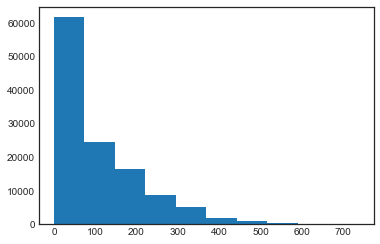

In [11]:
#not neeeded
plt.style.use('seaborn-white')
plt.hist(lead_time)

data = df[['lead_time','adr']]
correlation = data.corr(method='pearson')

correlation


0    74745
1    44157
Name: is_canceled, dtype: int64
Percent Not Cancelled: 62.958371722924866
Percent Cancelled: 37.041628277075134


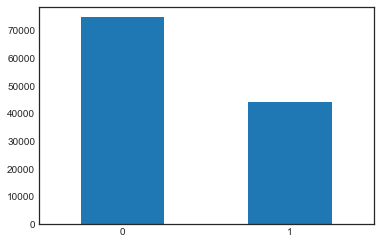

In [12]:
df.is_canceled.value_counts().plot(kind='bar')  
print(df.is_canceled.value_counts())
#note: significantly high number of canceled bookings in this dataset 37.04% of bookings were canceled 
zero =(75166/(75166+44224))*100
one = (44224/(75166+44224))*100

plt.xticks(rotation=0)
print('Percent Not Cancelled:', zero)
print('Percent Cancelled:', one)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(2015, 0)'),
  Text(1, 0, '(2015, 1)'),
  Text(2, 0, '(2016, 0)'),
  Text(3, 0, '(2016, 1)'),
  Text(4, 0, '(2017, 0)'),
  Text(5, 0, '(2017, 1)')])

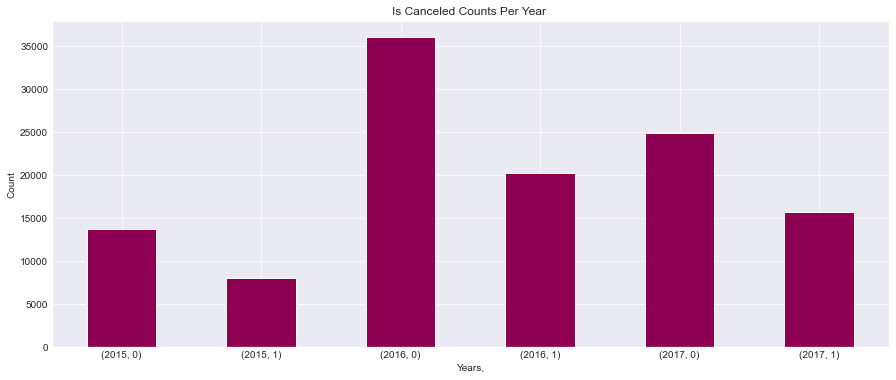

In [13]:
#Now let's look at the value counts of cancelled and not cancelled bookings in our dataset
#2016 had the highest number of cancellations but also the highest not canceled bookings
#Each year the number of cancellations was lower than the number of not cancelled booking 

sns.set_style('darkgrid')

df['year'] = df['date'].dt.year
df.groupby('year').is_canceled.value_counts().plot(kind = 'bar',figsize=(15,6), cmap='PiYG')
 

# Aesthetics
plt.title("Is Canceled Counts Per Year ")
plt.xlabel("Years,")
plt.ylabel("Count")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

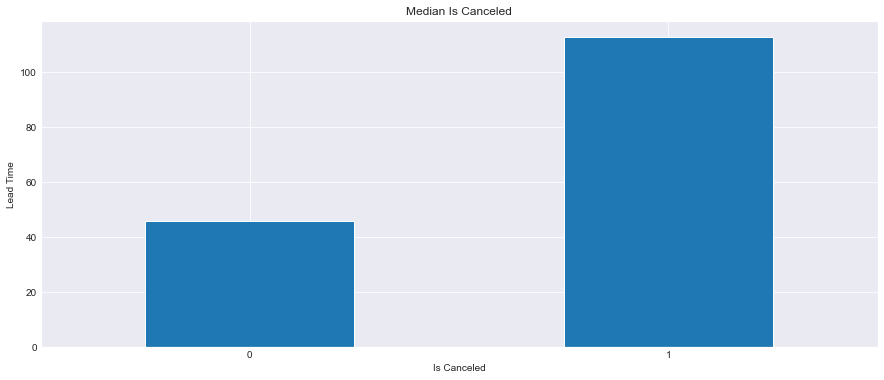

In [14]:
#median lead time cancellation chart 0,1 for all years 

sns.set_style('darkgrid')
ax = df.groupby('is_canceled').lead_time.median()
ax.plot(kind='bar', figsize=(15,6))


# Aesthetics
plt.title("Median Is Canceled")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.xticks(rotation=0)


#50% of the bookings that were canceled were booked 113 days in advance

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

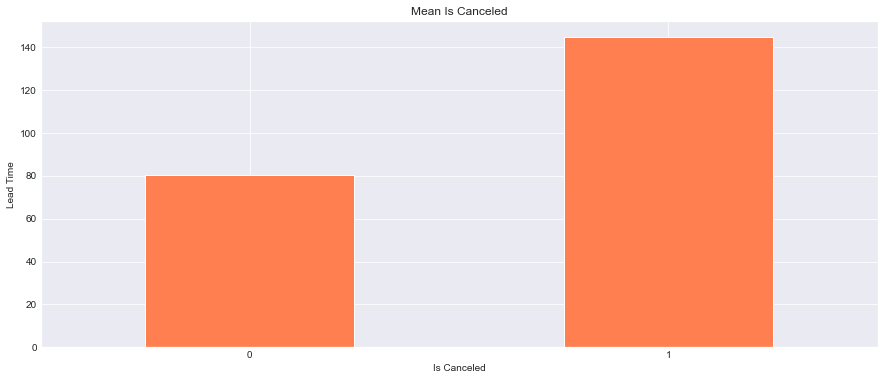

In [15]:
sns.set_style('darkgrid')
ax = df.groupby('is_canceled').lead_time.mean()
fig = ax.plot(kind='bar', figsize=(15,6), color="coral")
fig

# Aesthetics
plt.title("Mean Is Canceled")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.xticks(rotation=0, horizontalalignment="center")

#On average the number of bookings that were canceled were booked 144 days in advance

In [16]:
df[df.is_canceled==1].lead_time.mean()


144.91244876237064

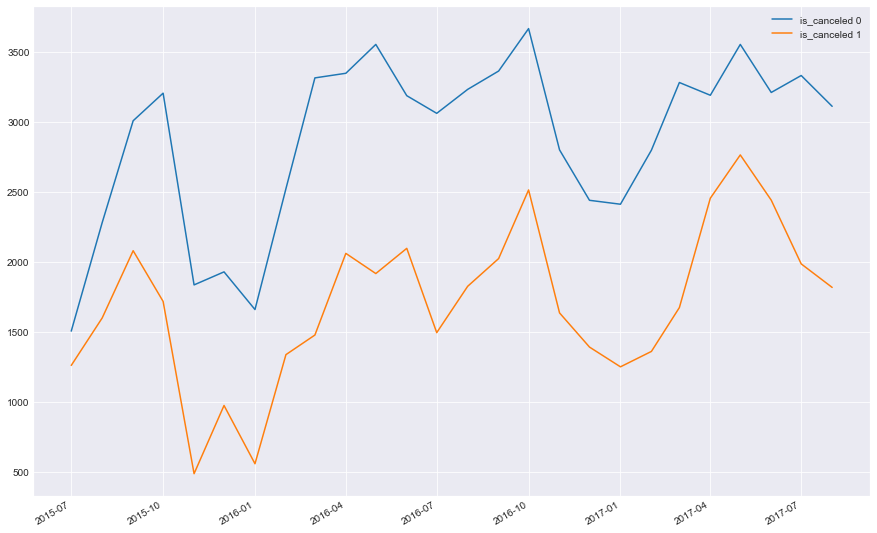

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize']= 20,6

df['year_month'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str), format='%Y%B')
year_month = df['year_month']
df[df.is_canceled == 0].year_month.value_counts().plot(kind='line', figsize=(15,10),  label = 'is_canceled 0')
df[df.is_canceled == 1].year_month.value_counts().plot(kind='line', figsize=(15,10),  label = 'is_canceled 1')
plt.legend()
plt.show()

#we can see that over time the cancellations and bookings not canceled follow a similar trend to one another over time 


In [18]:
#is there a statistical difference between
#the mean of the average daily rate of cancelled bookings and not cancelled bookings
#use an ANOVA

In [19]:
#Overall findings from exploratory data analysis
    #On average, consumers booked in advance 104 days ahead of their booking (where 1 Standard deviation ~ 107 days)
        #Half of the consumers in our dataset booked 69 days in advance and a quarter of the consumers had a lead time greater than 161 days

    #On average the average daily rate for a booking was $102 (where S.D.= $50.5)
        #Half of the bookings had a average daily rate of $95 and 25% had a avg daily rate of $126
    
    #37.13% of the bookings were canceled in this dataset. This is a large number of canacellations.
    
    #2016 had the highest number of cancellations but also the highest not canceled bookings
    #Each year the number of cancellations was lower than the number of not cancelled booking 
    
    #50% of the bookings that were canceled were booked 113 days in advance
    
    #On average the number of bookings that were canceled were booked 144 days in advance
    
    #Found no correlations in this dataset amongst numerical variables, and no correlations using point biserial correlation with is_canceled

    

In [20]:
#What variables would be good predictors of is_canceled using logistic regression?
#TWO WAY ANOVA: https://www.scribbr.com/statistics/two-way-anova/
#Run a two way anova to find out if there is a sig difference in means between the average daily rate of canceled and not canceled 
#can also run on lead time 
#normalize data and look at assumptions of the test first 